# Assignment 6
## Dayanara Lebron Aldea

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

In [1]:
#Import packages:
#%cd ..
import pandas as pd
import matplotlib
import sqlalchemy as sqla
import sqlite3 as sql


db=sql.connect("sf_data.sqlite")
pd.read_sql("SELECT * FROM mobile_food_schedule LIMIT 5", db)

,locationid,permit,DayOfWeek,EndHour,StartHour
0,305727,11MFF-0040,Mo,15,10
1,305727,11MFF-0040,Tu,15,10
2,305727,11MFF-0040,We,15,10
3,305727,11MFF-0040,Th,15,10
4,305727,11MFF-0040,Fr,15,10


__Exercise 1.1.__ Which mobile food vendor(s) sells at the most locations?

In [2]:
#Overall permits per locations 
table=pd.read_sql("select permit,locationid, count(*) as count from mobile_food_schedule group by locationid",db)
permit_counts=table["permit"].value_counts().head()



In [3]:
pd.read_sql("select permit,applicant from mobile_food_permits where permit='17MFF-0110' ",db)

,permit,Applicant
0,17MFF-0110,May Catering


### The mobile food vendor that sells at most locations is #17MFF-0110 : May Catering. 

__Exercise 1.2.__ Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

### My questions:

- What areas recieve more noise complaints by excessive noise in SF?
- What are the most common type of crime reports? Are they related to a certain district?
- Crime related- what are the areas with more arrests on drugs by type?
- What is the association of park, schools and robbery cases in 2015?
- What are the best times and places to find food trucks?



In [4]:
#Install modules:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Crime Dataset: Q1-What are the most common type of crime reports? Are they related to a certain district?

In [30]:
crime=pd.read_sql("SELECT * FROM crime", db)
crime_count_table=pd.read_sql("SELECT Category, count (*) as count from crime group by Category LIMIT 5",db)

/Users/dlaldea/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


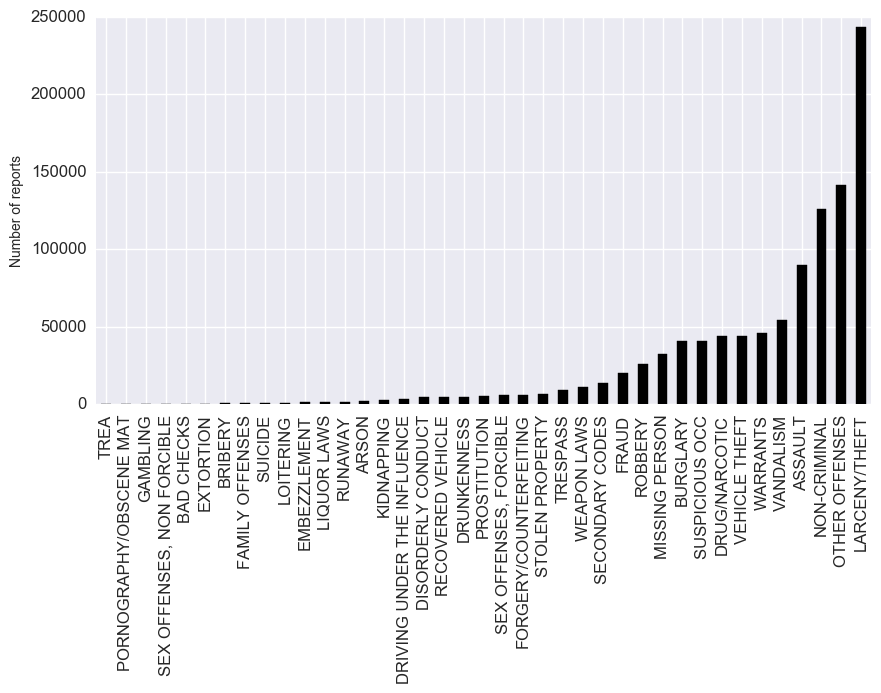

In [6]:

#I want to see the number of reports done per category
def plotdat(data,cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdat(crime,'Category')


In [7]:
#Lets look at the top crimes for each district 
#Group by crime type and district 
crime_by_disct=crime.groupby('Descript').PdDistrict.value_counts(sort=True)
complete_crime_disct=crime_by_disct.unstack().fillna(0)
total_num_comp=complete_crime_disct.sum(axis=0)
crime_sum=complete_crime_disct.sum(axis=1)
pct=np.percentile(crime_sum,98)
subset=crime_sum[crime_sum>pct]
top_crimes=complete_crime_disct.loc[subset.index]
print top_crimes.head()

PdDistrict                             BAYVIEW  CENTRAL  INGLESIDE  MISSION  \
Descript                                                                      
AIDED CASE, MENTAL DISTURBED            1895.0   2919.0     2326.0   4444.0   
BATTERY                                 2238.0   2911.0     2183.0   4343.0   
DRIVERS LICENSE, SUSPENDED OR REVOKED   6311.0   2340.0     3896.0   4321.0   
FOUND PERSON                            2430.0    922.0     1765.0   1968.0   
FOUND PROPERTY                          1580.0   2408.0     1275.0   2390.0   

PdDistrict                             NORTHERN    PARK  RICHMOND  SOUTHERN  \
Descript                                                                      
AIDED CASE, MENTAL DISTURBED             3089.0  1704.0    1340.0    7038.0   
BATTERY                                  3179.0  1223.0    1064.0    5768.0   
DRIVERS LICENSE, SUSPENDED OR REVOKED    2338.0  1274.0    1323.0    5693.0   
FOUND PERSON                             1137.0  17

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

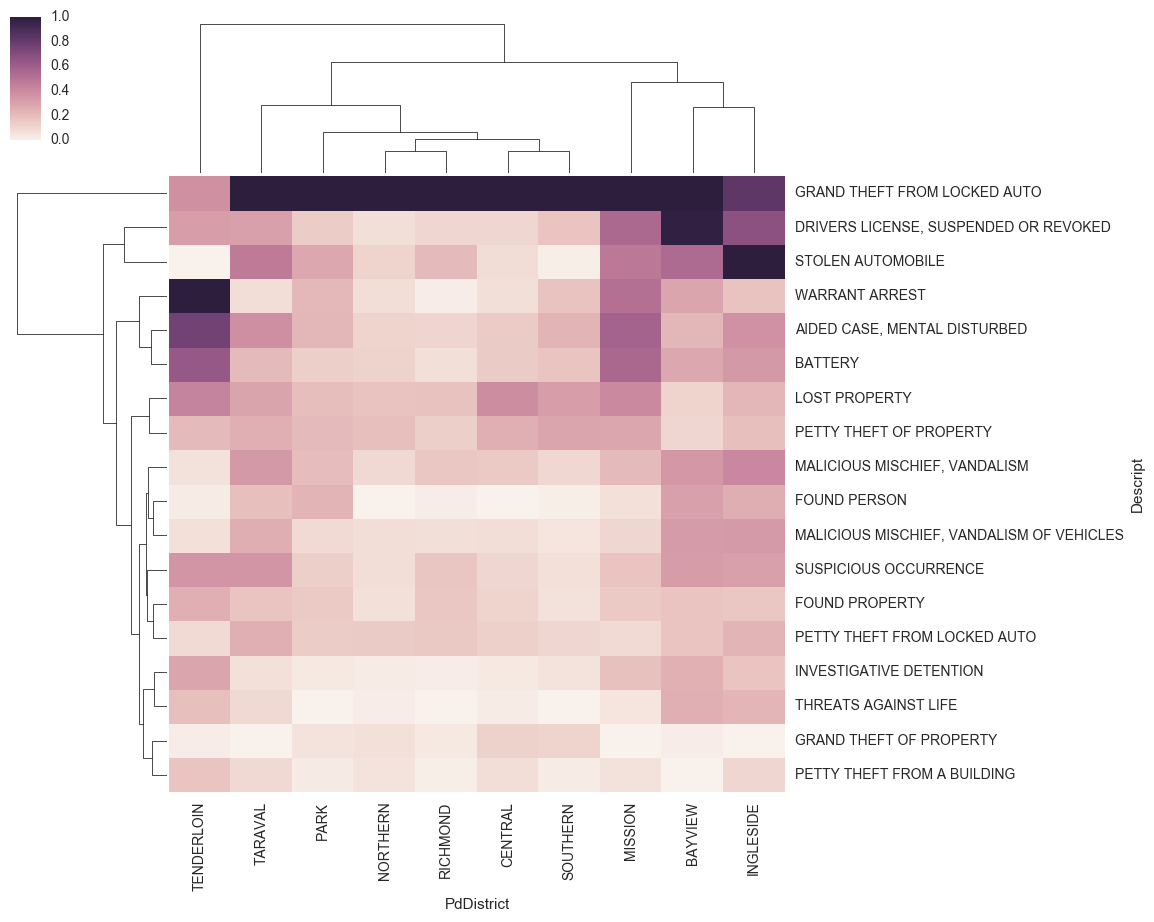

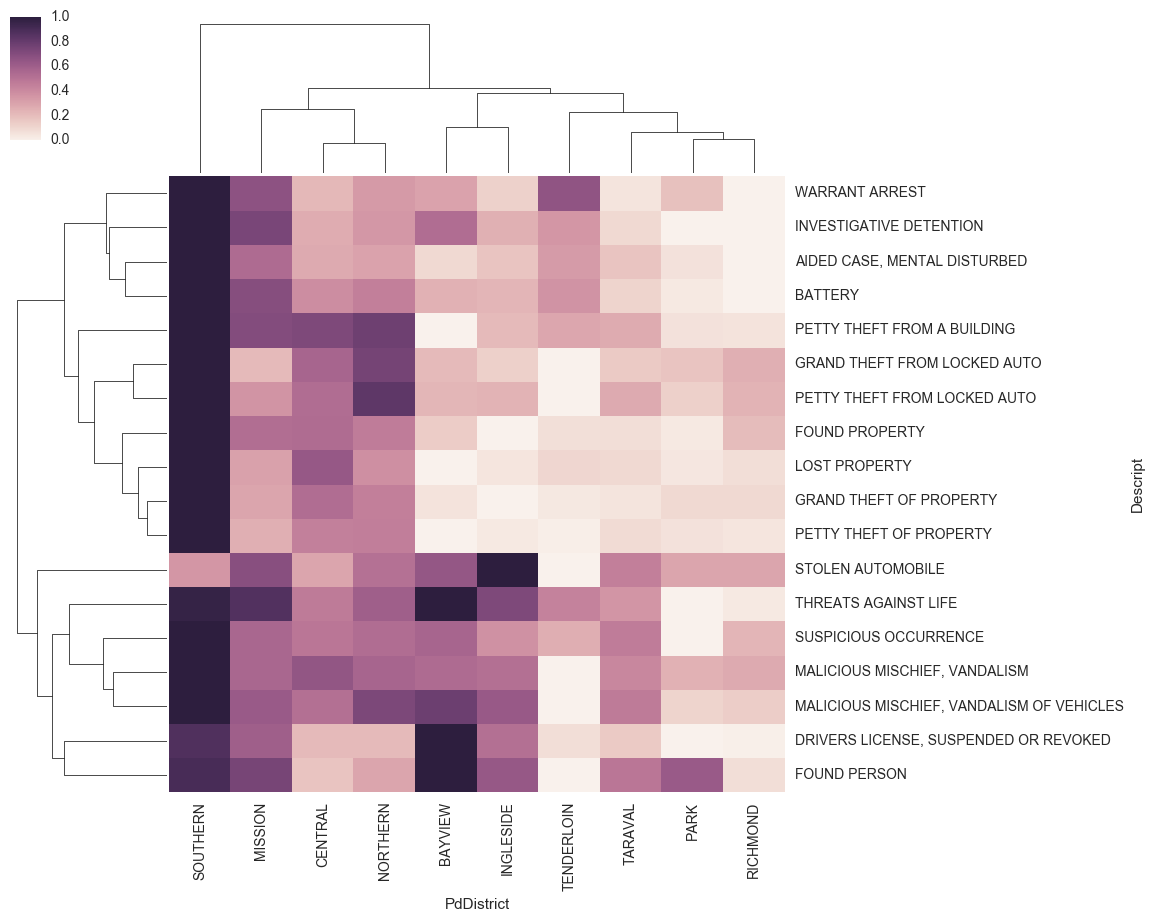

In [8]:
#Normalize across pd.district
g=sns.clustermap(top_crimes,standard_scale=1)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0) 

#Normalize across crimes
k=sns.clustermap(top_crimes,standard_scale=0)
plt.setp(k.ax_heatmap.get_yticklabels(), rotation=0) 



In this heatmap we are looking at the top 18 cases, to answer the question of: 
What are the most common type of reports/complaints? Are they related to a certain district?

The most reported crime was Theft/Larceny according to the barplot with more than 250k cases.
Across all the Districts, Grant Theft Auto is the most common crime, except in Tenderloin where the most common crime is Warrant Arrest, Aided Case and battery. We also see that Ingleside has a high rate of cases of people having their driver’s license suspended and stolen automobile. 

When we look at the distribution of crimes across the areas, we see that the Southern part has a high amount of reports for all kinds of thefts, threats, vandalism, arrests etc. as the graphic above displays. Ingleside and has high incidences of stolen vehicles and Bayview has threats against life. The areas with least cases are Richmond, park and tenderloin.  


## Question 2: Drug Cases in Crime Dataset
## What are the areas with more arrests on drugs by type?

In [9]:
drug_cat=crime[crime['Category']=='DRUG/NARCOTIC']
d=drug_cat['Descript'].value_counts()
d.sort(ascending=False)
d.head()

/Users/dlaldea/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


POSSESSION OF NARCOTICS PARAPHERNALIA    7753
POSSESSION OF MARIJUANA                  4799
POSSESSION OF METH-AMPHETAMINE           4755
POSSESSION OF BASE/ROCK COCAINE          2788
POSSESSION OF MARIJUANA FOR SALES        2456
Name: Descript, dtype: int64

[None, None, None, None, None, None, None, None, None, None, None]

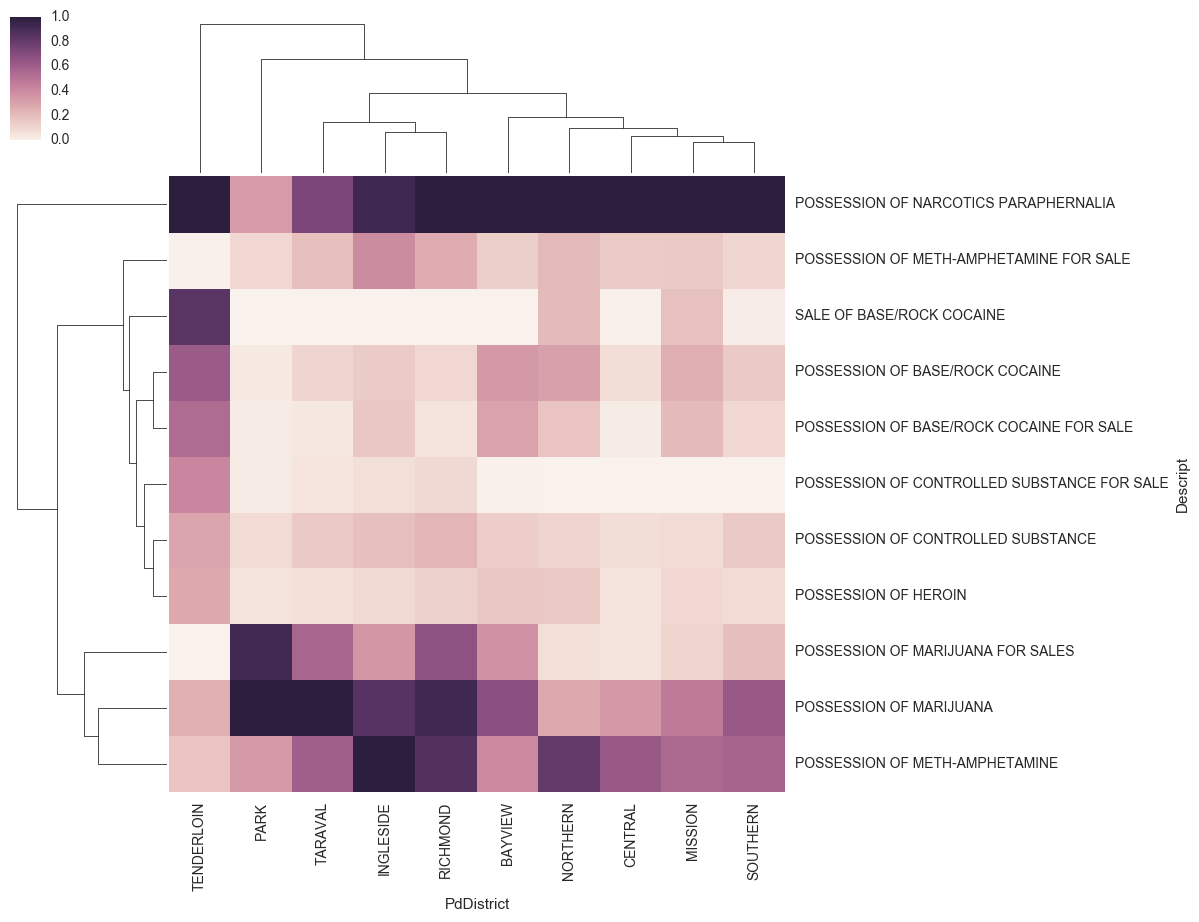

In [10]:

drug_by_disct=drug_cat.groupby('Descript').PdDistrict.value_counts(sort=True)
complete_drug_disct=drug_by_disct.unstack().fillna(0)
total_num_drug=complete_drug_disct.sum(axis=0)
drug_sum=complete_drug_disct.sum(axis=1)
pct=np.percentile(drug_sum,85)
subset=drug_sum[drug_sum>pct]
top_drugs=complete_drug_disct.loc[subset.index]

p=sns.clustermap(top_drugs,standard_scale=1)
plt.setp(p.ax_heatmap.get_yticklabels(), rotation=0) 



In [11]:
lat_lon=crime[crime["Descript"].isin(top_drugs.index.values)][["Descript","Lon","Lat"]]
marihuana=lat_lon[lat_lon["Descript"].str.contains("MARIJUANA")]
meth=lat_lon[lat_lon["Descript"].str.contains("METH-AMPHETAMINE")]
heroin=lat_lon[lat_lon["Descript"].str.contains("HEROIN")]
cocaine=lat_lon[lat_lon["Descript"].str.contains("COCAINE")]
substance=lat_lon[lat_lon["Descript"].str.contains("SUBSTANCE")]



### Plot drug cases by drug_type

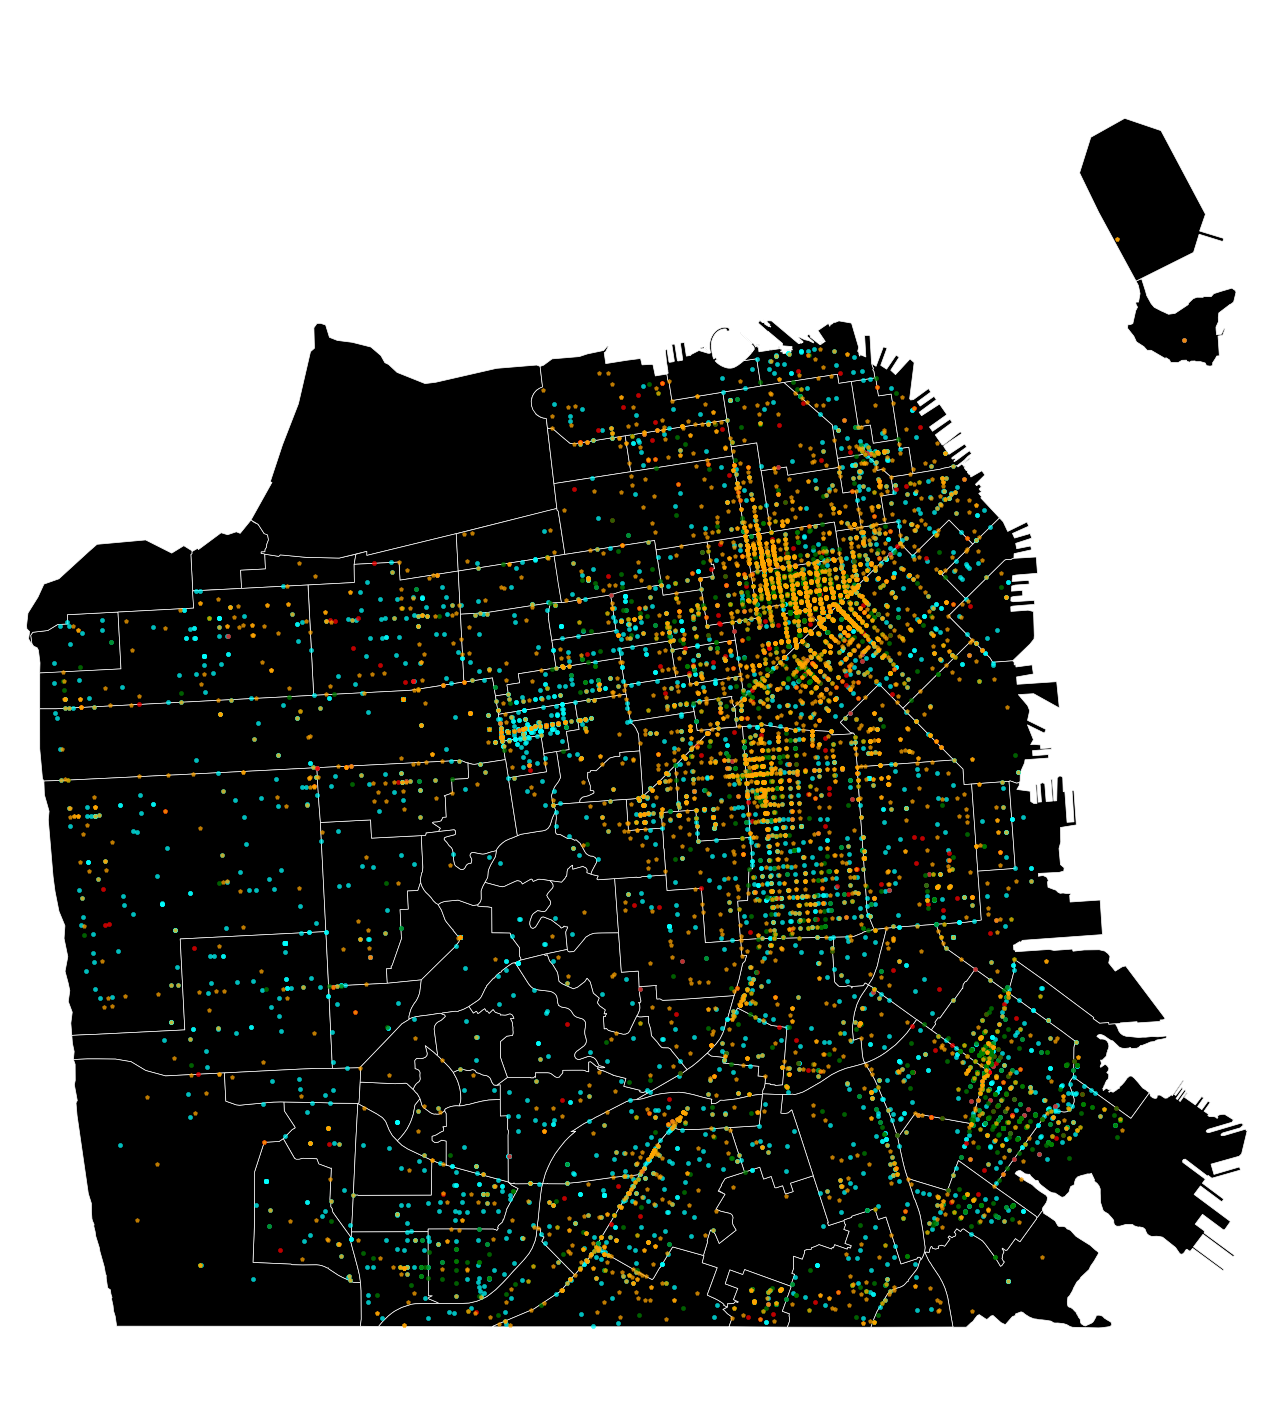

In [18]:
#Install modules
from mpl_toolkits.basemap import Basemap
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from matplotlib.collections import PatchCollection

#%cd "sffind_neighborhoods/"

#Draw SF MAP
#m = Basemap(llcrnrlon=-123.0, llcrnrlat=37.5, urcrnrlon=-122.0, urcrnrlat=38.0,
#    projection="tmerc", lat_0=33.7, lon_0=-122,lat_ts=0,resolution="i",  ellps = 'WGS84'
#           ,suppress_ticks=True)

m = Basemap(
    projection='tmerc',
    lon_0=-122.,
    lat_0=37.7,
    ellps = 'WGS84',
    llcrnrlon=-122.514897231999 - 0.01 * ( -122.35698198799994+122.5148972319999),
    llcrnrlat=37.708089209000036 -0.01  + 0.01 * (37.83239597600004-37.708089209000036),
    urcrnrlon=-122.35698198799994 + 0.01 * ( -122.35698198799994+122.5148972319999),
    urcrnrlat=37.83239597600004 + 0.01+ 0.01 * (37.83239597600004-37.708089209000036),
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)


m.readshapefile("geo_export_a1bbb4f8-a886-40fc-ad4c-d45c59f53e19", "SF", zorder=2)

# Set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.SF],
    'ward_name': [ward['name'] for ward in m.SF_info]})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000

def makePoints(dat):
    # Create Point objects in map coordinates from dataframe lon and lat values
    map_points = pd.Series([Point(m(mapped_x,mapped_y)) for mapped_x, mapped_y in zip(dat['Lon'],dat['Lat'])])
    plt_points = MultiPoint(list(map_points.values))
    hoods_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
    pts = filter(hoods_polygon.contains,plt_points)
    return pts

#Compute points according to type of drug
mari_points=makePoints(marihuana)
heroin_points=makePoints(heroin)
coke_points=makePoints(cocaine)
meth_points=makePoints(meth)
subs_point=makePoints(substance)

#Draw neighborhoods with polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#000000',
    ec='#ffffff', lw=.5, alpha=1,
    zorder=4))

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

#Add points
dev = m.scatter(
    [geom.x for geom in mari_points],
    [geom.y for geom in mari_points],
    10, marker='o', lw=.25,
    facecolor='cyan', edgecolor='cyan',
    alpha=0.75, antialiased=True,
    label='Marihuana', zorder=3)

dev = m.scatter(
    [geom.x for geom in heroin_points],
    [geom.y for geom in heroin_points],
    10, marker='o', lw=.25,
    facecolor='red', edgecolor='red',
    alpha=0.75, antialiased=True,
    label='Heroin', zorder=3)

dev = m.scatter(
    [geom.x for geom in coke_points],
    [geom.y for geom in coke_points],
    10, marker='o', lw=.25,
    facecolor='green', edgecolor='green',
    alpha=0.75, antialiased=True,
    label='Cocaine', zorder=3)
dev = m.scatter(
    [geom.x for geom in meth_points ],
    [geom.y for geom in meth_points],
    10, marker='p', lw=.25,
    facecolor='orange', edgecolor='orange',
    alpha=0.75, antialiased=True,
    label='Crack', zorder=3)



ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))
plt.tight_layout()
fig.set_size_inches(15,15)


#GREEN:COCAINE
#ORANGE:METH
#RED:HEROIN
#CYAN: MARIHUANA

In the Drug/Narcotics division of the reports there where 7,753 reports on POSSESSION OF NARCOTICS PARAPHERNALIA.  When decided to look which cases were prominent across the districts we see that that same category has a lot of cases in all districts except Park. Although Park had the most cases of possesion of marihuana and marihuana for sale. Northern, Ingleside and Richmond were rich in cases of possesion of metamphetamine. 

The diagram above shows that the incidences of Crack(orange) and Cocaine(green) are overlayed in the area of Tenderloin and Downtown and South of Market according to comparisons with the map in SF Find Neighborhoods. We also see other Cocaine arrests in clustered in Bayview. Marihuana arrests are more spreaded over the region although some of the arrests were made on the Civic Center. 

Marihuana arrests in cyan color show to have a cluster in Haight Ashbury. 

## Question 3: Noise Complaints Dataset: What are the areas with more arrests on drugs by type?(map)

In [20]:
noise=pd.read_sql("SELECT * FROM noise", db)
noise_count =pd.read_sql("SELECT Type, count(*) as count FROM noise group by Type", db)
noise_table=pd.read_sql("SELECT Type,Neighborhood, count(*) as count from noise group by Type,Neighborhood",db)

/Users/dlaldea/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


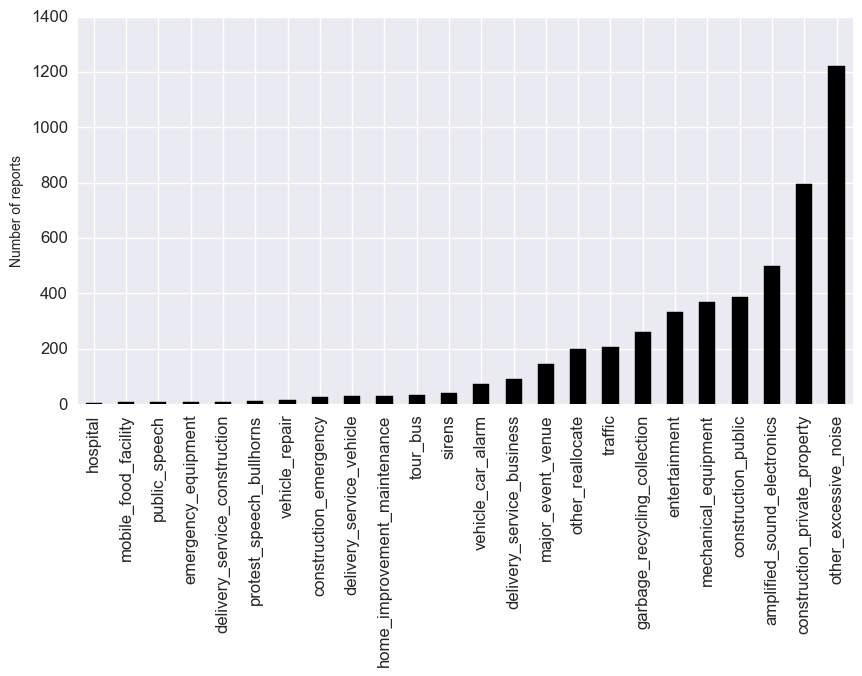

In [21]:
plotdat(noise, "Type")

In [23]:
noise_table[noise_table["Type"]=="other_excessive_noise"]["count"].sum()
#1,222 cases
noise_by_neigh=noise_table[noise_table["Type"]=="other_excessive_noise"]
noise_subset=noise_by_neigh.sort("count",ascending=False)
print noise_subset.head()

                      Type     Neighborhood  count
555  other_excessive_noise             None    162
619  other_excessive_noise     Outer Sunset    149
608  other_excessive_noise          Mission     77
639  other_excessive_noise  South of Market     51
601  other_excessive_noise   Lower Nob Hill     45


/Users/dlaldea/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Plot noise incidences on map 

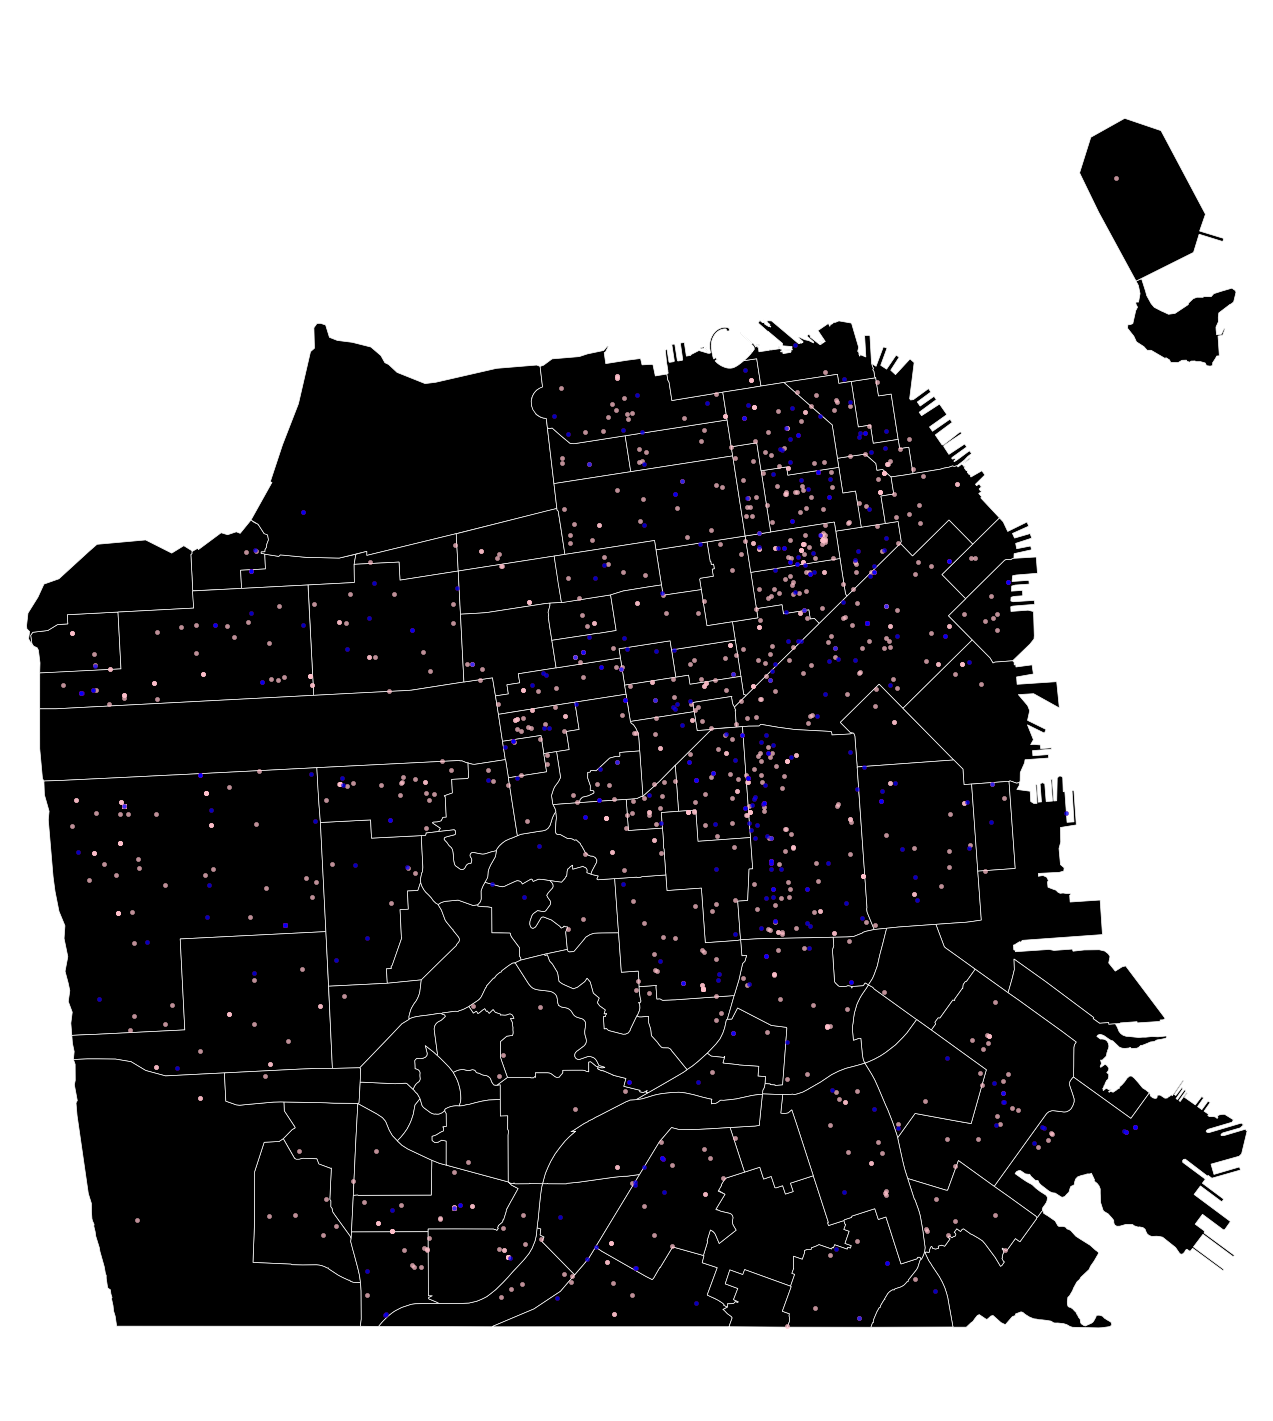

In [28]:
noise_data=noise[noise["Type"]=="other_excessive_noise"]
amp_sound=noise[noise["Type"]=="amplified_sound_electronics"]
excessive_noisepts=makePoints(noise_data)
amp_sound_pts=makePoints(amp_sound)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

dev = m.scatter(
    [geom.x for geom in excessive_noisepts],
    [geom.y for geom in excessive_noisepts],
    10, marker='o', lw=.25,
    facecolor='pink', edgecolor='pink',
    alpha=0.75, antialiased=True,
    label='Noises', zorder=3)

dev = m.scatter(
    [geom.x for geom in amp_sound_pts],
    [geom.y for geom in amp_sound_pts],
    10, marker='o', lw=.25,
    facecolor='blue', edgecolor='purple',
    alpha=0.75, antialiased=True,
    label='Noises', zorder=3)

ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))
plt.tight_layout()
fig.set_size_inches(15,15)



Top cases of noise were: other excessive noises and construction of private property. When looked more closer at the noise and construction of private property we can see that this type of reports are most common in the Outer Sunset Neighborhood and Mission District. 

I wanted to see if the cases of amplified_sound_electronics were more often in the areas of Embarcadero such as the fisherman warf etc. where all the street artists are, so I also plotted those in the map.  Contrary to my belief, the noise complaints for amplified sound come from Mission Dristrict and only a few were reported near Embarcadero.

Using the map it is hard to tell where the excessive noise complaints are concentrated, however one point we can make is that the complaints are less in the outer parts of the city.

## Question 4: Are robbery incidences happening near parks and schools?
# If so in what districts?

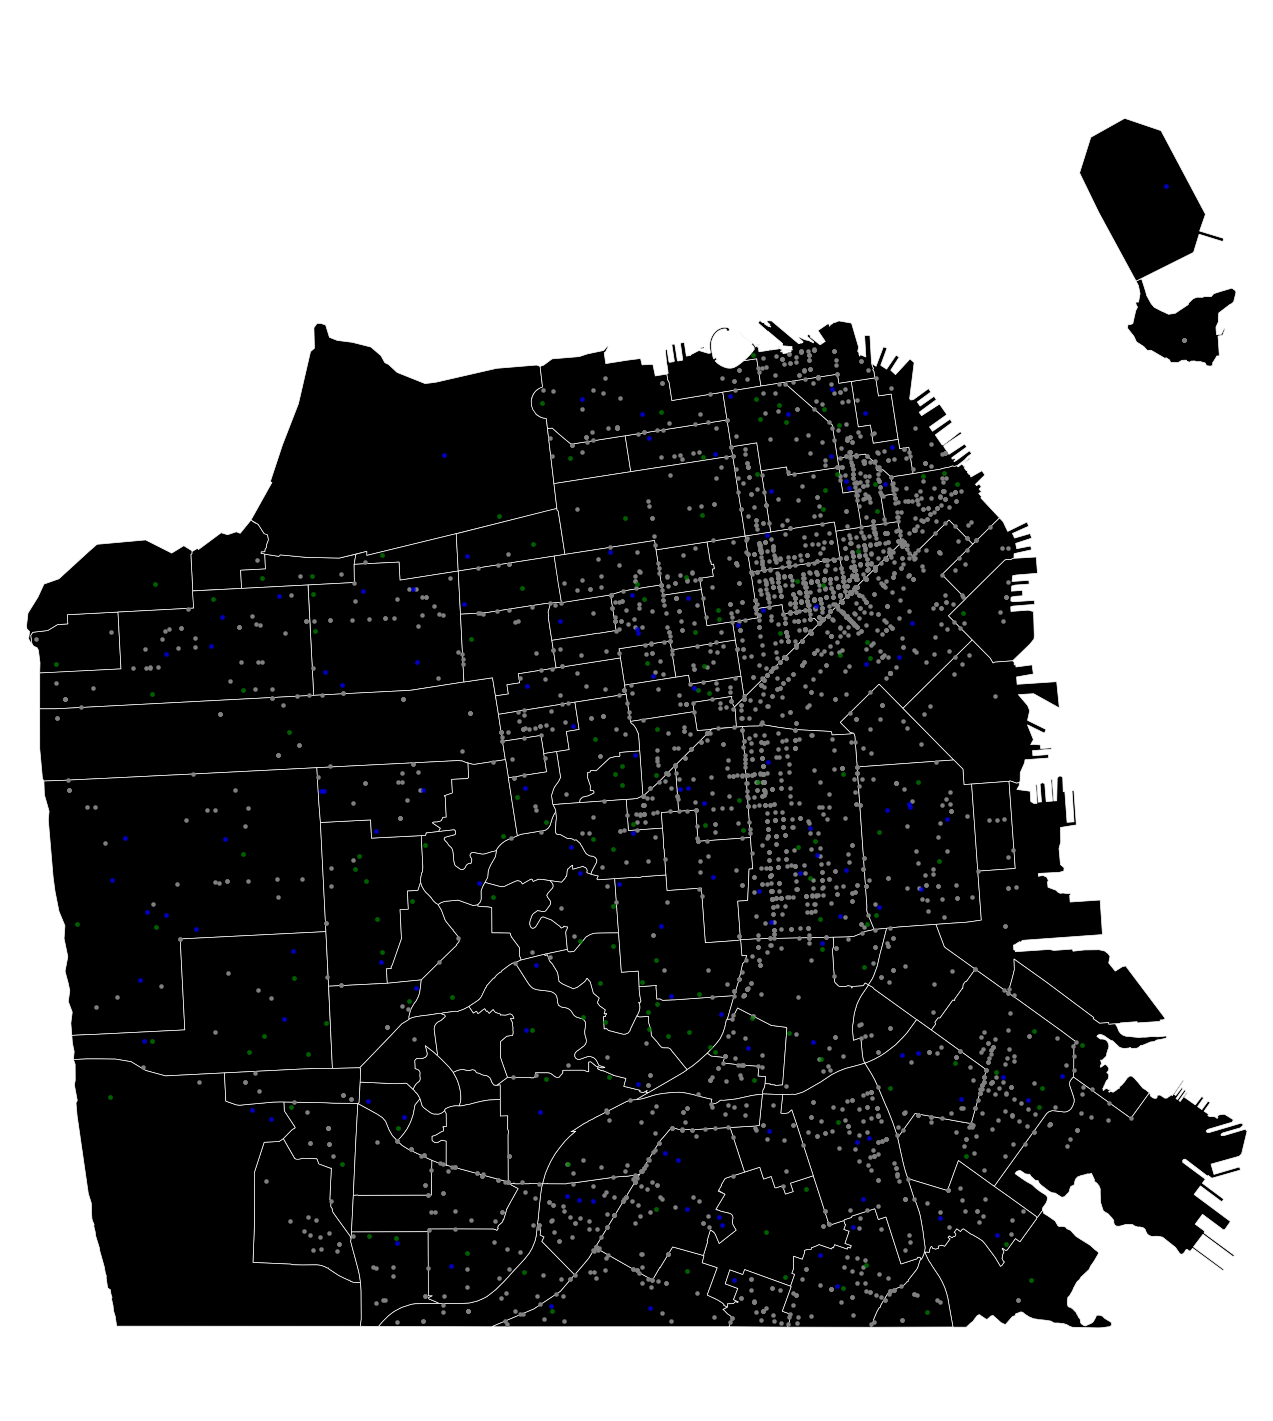

In [54]:
robbery=crime[crime["Category"]=="ROBBERY"]#25,706
#Lets look at data for 2015
rob2015=robbery[robbery["Datetime"].str.contains("2015")]#3759
rob2015pts=makePoints(rob2015)

#Now lets retrieve the data for parks and schools
parks=pd.read_sql("select * from parks",db)
schools=pd.read_sql("select * from schools",db)

#Lets take out mini-parks and community gardens 
parks=parks[parks["Type"]!="Mini Park"]
parkspt=makePoints(parks)

#Interest in Elementary Schools
schools_elem=schools[schools["GeneralType"]=="PS"]
elempts=makePoints(schools_elem)


#Plot results 
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)


dev = m.scatter(
    [geom.x for geom in rob2015pts],
    [geom.y for geom in rob2015pts],
    10, marker='o', lw=.10,
    facecolor='grey', edgecolor='grey',
    label='Robberies', zorder=3)

dev = m.scatter(
    [geom.x for geom in elempts],
    [geom.y for geom in elempts],
    10, marker='o', lw=.25,
    facecolor='blue', edgecolor='blue',
    alpha=0.75, antialiased=True,
    label='Schools', zorder=3)

dev = m.scatter(
    [geom.x for geom in parkspt],
    [geom.y for geom in parkspt],
    10, marker='o', lw=.25,
    facecolor='green', edgecolor='green',
    alpha=0.75, antialiased=True,
    label='Parks', zorder=3)


ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))
plt.tight_layout()
fig.set_size_inches(15,15)






   Majority of districts with 3+ schools have 2 parks in their surrounding, nevertheless there are some regions such as Cayuga which has 3 schools and no parks. Districts within the turistic area of SF have less than 2 schools, except Mission and Potrero Hill which have several. In those turistic districts with less schools had more cases of robbery in 2015, with exception of Mission District which has about 8 schools but is still in the zone where apparently all drug related crimes, robbery and also several noise complaints are being done (THIS IS BACKED UP WITH RESULTS FROM PREVIOUS GRAPHICS). We can just assume that Mission District is not safe. As of relationships of robberies and parks, Mission District has about 7 parks , which no other district has. Can having a lot of parks in an area of high crime incidence, worsen the situation? although it is not sure such correlation exists, being at a park at night could make people prone to robbery. 

## Question 5: What are the best times and places to find food trucks?


In [3]:
#To answer this, lets start by finding what days and times are the most have the most food trucks.
pd.read_sql("SELECT DayOfWeek, count (*) as count FROM mobile_food_schedule group by DayOfWeek order by count desc", db)



,DayOfWeek,count
0,Mo,736
1,Fr,651
2,We,643
3,Th,638
4,Tu,635
5,Sa,160
6,Su,129


In [44]:
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

table_schedule=pd.read_sql("Select StartHour, count(*) from mobile_food_schedule group by StartHour",db)
table_schedule2=table_schedule.set_index("StartHour")
table_schedule2.iplot(kind="bar",xTitle="Hour_of_Day", yTitle="number of overall schedules", title="Number of Schedules per Hour")


In [43]:
day_hour=pd.read_sql("Select StartHour,DayOfWeek, count(*) from mobile_food_schedule group by StartHour,DayOfWeek",db)
day_hour=day_hour.pivot(index="StartHour",columns="DayOfWeek")['count(*)']
day_hour.iplot(kind='scatter')

In [34]:
#Now lets inspect what type of mobile foods open at 9am-11pm and in what locations.

diff_table=pd.read_sql("Select StartHour,locationid,EndHour,permit, EndHour-StartHour as diff from mobile_food_schedule where StartHour between 9 and 11 ",db)
print max(diff_table[diff_table["StartHour"]==9]["diff"])

permits=set(diff_table["permit"])
locations=set(diff_table["locationid"])

#mobile_food_permits
#mobile_food_locations
#query="""
#Select from p.permit,p.applicant,l.*, k.locationid, k.Address from mobile_food_permits as p inner join mobile_food_schedule as l on p.permit=l.permit
#     left join mobile_food_locations as k on k.locationid=l.locationid"""
#pd.read_sql(query,db) 

permits_info=pd.read_sql("select permit,applicant from mobile_food_permits",db)
permits_location=pd.read_sql("select locationid,Address from mobile_food_locations",db)



13


In [65]:
permits10am=permits_info[permits_info["permit"].isin(permits)]
locations10am=permits_location[permits_location["locationid"].isin(locations)]
new_diff=pd.merge(diff_table,permits10am,on="permit")
new_diff=pd.merge(new_diff,locations10am,on="locationid")

#since we have 1791 schedules that meet the criteria starting from 9am on weekdays, 
#we will look at those establishments that operate more than 8 hours straight so 9am-5pm or 10 to 6pm


new_diff=new_diff[new_diff["diff"] >= 8].drop_duplicates()
new_diff.Applicant.value_counts().iplot(kind="bar")



Unlike expected it looks like the food trucks are more frequent week days, separately the most frequent hours of the days are from 9 to 10. This is congruent when inspected altogether we can see that Mondays-Friday at 9am is when establishments have reported to be open, up to 13 hours after 9.

During the starting hours of 9-11am, when looking at establishments that were open more than 8 hours, and we found out that the places are Halal Cart, Taza Halal in Market street and Santana ESG in Shotwell St and Harrison Strt, followed by Kettle Corn.

If you have been in San Francisco at late hours at night there are almost no food trucks available, only hotdog carts which might not even be registered in the food vendors so this analysis might be belieavable. 
